In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
# import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
# import fitsio

from astropy import units as u
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.stats import binned_statistic

from dust_extinction.parameter_averages import F99

sys.path.append('/Users/rongpu/git/Python/user_modules/')
from user_common import extrap1d

In [2]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
r_v = 3.1
ebv = 0.03 # there is a slight dependence of r_b on the E(B-V) value

bands = ['decam_g', 'decam_r', 'decam_z']
filenames = ['decam.g.am1p4.dat.txt', 'decam.r.am1p4.dat.txt', 'decam.z.am1p4.dat.txt']

In [4]:
# Stellar spectrum
# In flux unit
sy_star = np.loadtxt('/Users/rongpu/git/LSST-Testbed/Others/extinction/Munari 7000K spectrum/T07000G45M10V000K1AODNVD01F.ASC')
sx_star = np.linspace(2500.5, 10499.5, 8000)

# Smoothing
smooth_sy_star, binned_x_edges, _ = binned_statistic(sx_star, sy_star, statistic='mean', bins=len(sx_star)//20)
smooth_sx_star = (binned_x_edges[:-1]+binned_x_edges[1:])/2
f_norm = smooth_sy_star[np.argmin(np.abs(smooth_sx_star-5500))]
smooth_sy_star = smooth_sy_star/f_norm

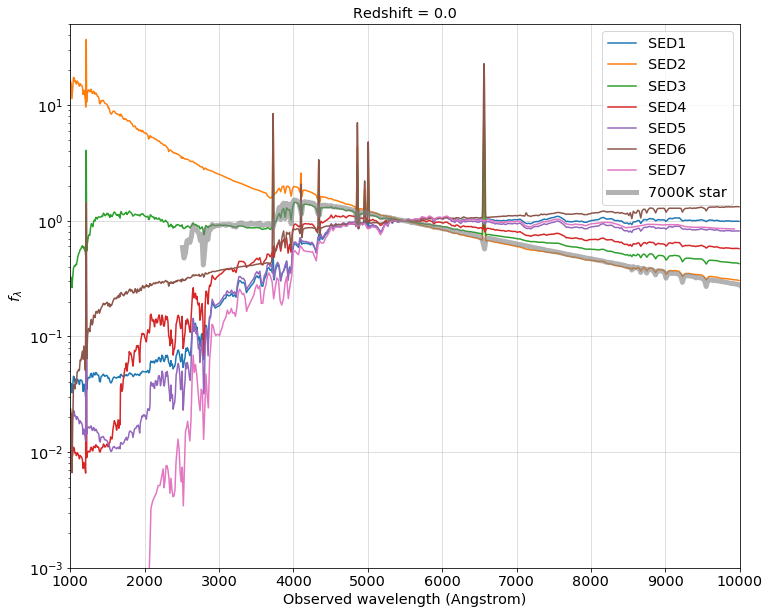

In [20]:
redshift = 0.

plt.figure(figsize=(12, 10))
for sed_index in range(1, 8):
    
    # Galaxy spectrum f_lambda (in flux unit)
    fn = '/Users/rongpu/git/desi-misc/extinction/templates/EAZY_v1.1_lines/eazy_v1.1_sed{}.dat'.format(sed_index)
    # fn = '/Users/rongpu/git/desi-misc/extinction/templates/BR07/default_sed{}.dat'.format(sed_index)
    if os.path.isfile(fn):
        tmp = Table.read(fn, format='ascii')
    else:
        break
    sx, sy = tmp['col1'], tmp['col2']
    # redshifting
    sx *= (1+redshift)
    
    f_norm = sy[np.argmin(np.abs(sx-5500))]
    sy = sy/f_norm
    mask = (sx>1000) & (sx<10000)
    plt.plot(sx[mask], sy[mask], label='SED{}'.format(sed_index))

plt.plot(smooth_sx_star, smooth_sy_star, 'gray', linewidth=5, alpha=0.6, label='7000K star')
plt.title('Redshift = {}'.format(redshift))
plt.xlabel('Observed wavelength (Angstrom)')
plt.ylabel('$f_\lambda$')

plt.xlim(1000, 10000)
plt.ylim(1e-3, 5e1)
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

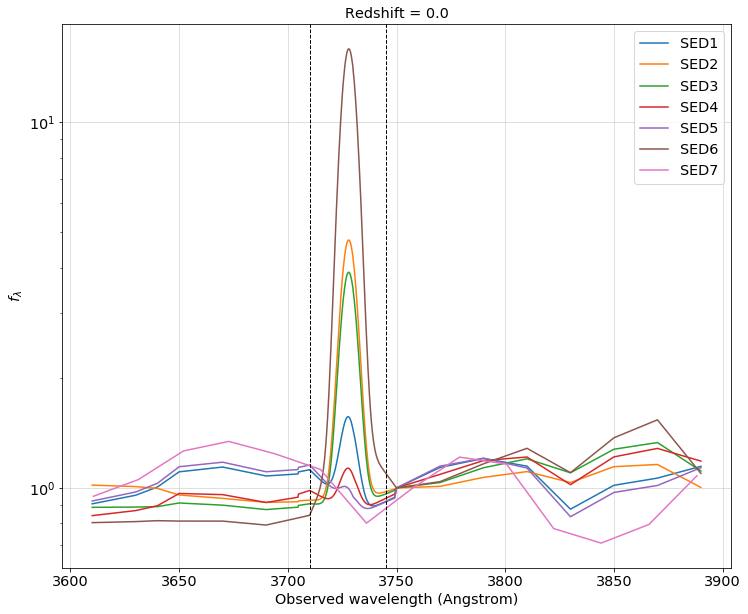

In [24]:
redshift = 0.

plt.figure(figsize=(12, 10))
for sed_index in range(1, 8):
    
    # Galaxy spectrum f_lambda (in flux unit)
    fn = '/Users/rongpu/git/desi-misc/extinction/templates/EAZY_v1.1_lines/eazy_v1.1_sed{}.dat'.format(sed_index)
    # fn = '/Users/rongpu/git/desi-misc/extinction/templates/BR07/default_sed{}.dat'.format(sed_index)
    if os.path.isfile(fn):
        tmp = Table.read(fn, format='ascii')
    else:
        break
    sx, sy = tmp['col1'], tmp['col2']
    # redshifting
    sx *= (1+redshift)
    
    f_norm = sy[np.argmin(np.abs(sx-3757))]
    sy = sy/f_norm
    mask = (sx>3600) & (sx<3900)
    plt.plot(sx[mask], sy[mask], label='SED{}'.format(sed_index))

# plt.plot(smooth_sx_star, smooth_sy_star, 'gray', linewidth=5, alpha=0.6, label='7000K star')
plt.title('Redshift = {}'.format(redshift))
plt.xlabel('Observed wavelength (Angstrom)')
plt.ylabel('$f_\lambda$')

plt.axvline(3710, lw=1, color='k', ls='--')
plt.axvline(3745, lw=1, color='k', ls='--')
# plt.xlim(1000, 10000)
# plt.ylim(1e-3, 5e1)
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

/Users/rongpu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
/Users/rongpu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  

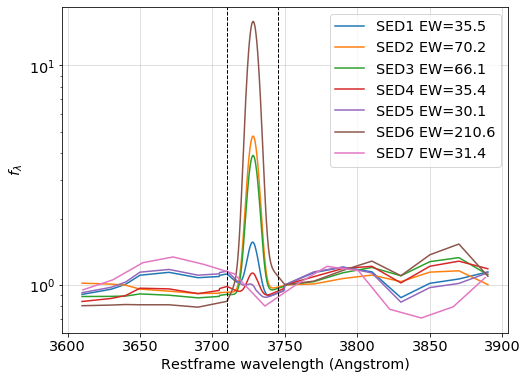

In [33]:
plt.figure(figsize=(8, 6))
for sed_index in range(1, 8):
    
    # Galaxy spectrum f_lambda (in flux unit)
    fn = '/Users/rongpu/git/desi-misc/extinction/templates/EAZY_v1.1_lines/eazy_v1.1_sed{}.dat'.format(sed_index)
    # fn = '/Users/rongpu/git/desi-misc/extinction/templates/BR07/default_sed{}.dat'.format(sed_index)
    if os.path.isfile(fn):
        tmp = Table.read(fn, format='ascii')
    else:
        break
    sx, sy = tmp['col1'], tmp['col2']
    # # redshifting
    # sx *= (1+redshift)

    f_norm = sy[np.argmin(np.abs(sx-3757))]
    sy = sy/f_norm
    
    mask = (sx>3600) & (sx<3900)
    xmin, xmax = 3710, 3745
    mask1 = (sx>xmin) & (sx<xmax)
    s_interp = extrap1d(sx[mask], sy[mask])
    ew = quad(s_interp, xmin, xmax)[0]/np.median(sy[mask & (~mask1)])
    
    plt.plot(sx[mask], sy[mask], label='SED{} EW={:.1f}'.format(sed_index, ew))

# plt.plot(smooth_sx_star, smooth_sy_star, 'gray', linewidth=5, alpha=0.6, label='7000K star')
# plt.title('Redshift = {}'.format(redshift))
plt.xlabel('Restframe wavelength (Angstrom)')
plt.ylabel('$f_\lambda$')

plt.axvline(3710, lw=1, color='k', ls='--')
plt.axvline(3745, lw=1, color='k', ls='--')
# plt.xlim(1000, 10000)
# plt.ylim(1e-3, 5e1)
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.5)
plt.show()